# Ames, Iowa : Predicting Sales Prices - Linear Regression Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from LR_helper import cat_column_combine_vars, num_new_features, label_encode_features, model_results
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

## Loading cleaned training and testing datasets:-

In [2]:
train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)

### 1. Viewing and checking datasets:-

In [3]:
train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1453, 80)

In [5]:
test_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,Inside,...,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal


In [6]:
test_df.shape

(1457, 79)

In [7]:
# train_df.info()
# test_df.info()

### 2. Checking correlations for all features with SalePrice :-

<AxesSubplot:>

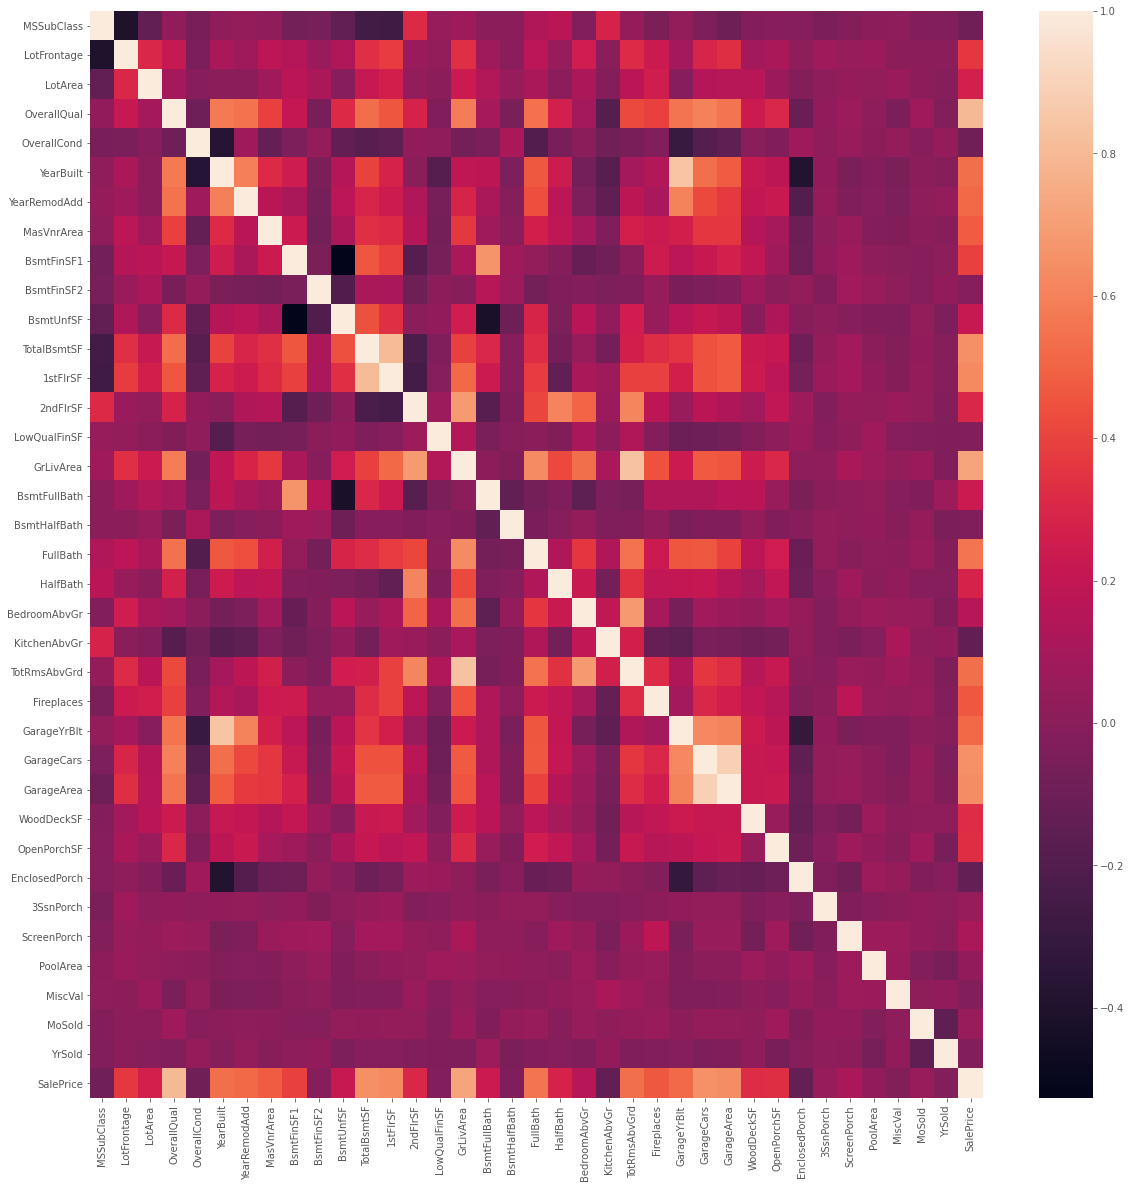

In [8]:
# Checking correlations for all features with SalePrice

plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr())

### 3. Checking distributions/histograms of some numerical features:

<Figure size 720x720 with 0 Axes>

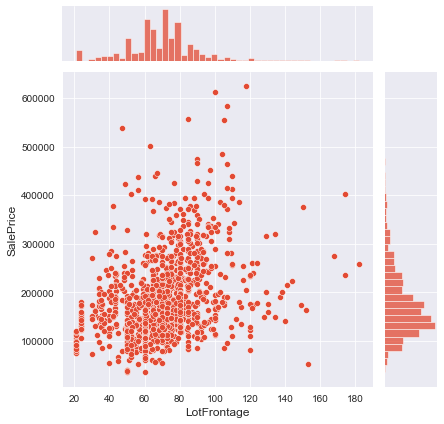

<Figure size 720x720 with 0 Axes>

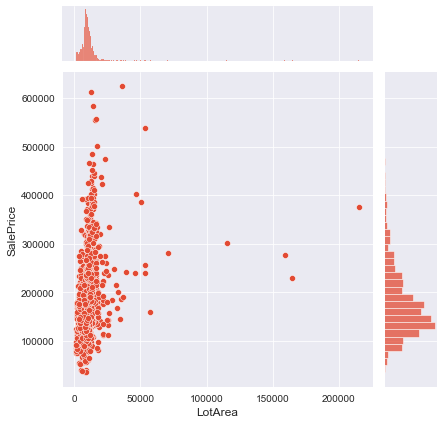

<Figure size 720x720 with 0 Axes>

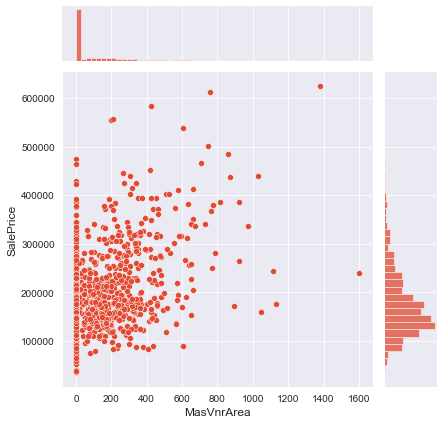

<Figure size 720x720 with 0 Axes>

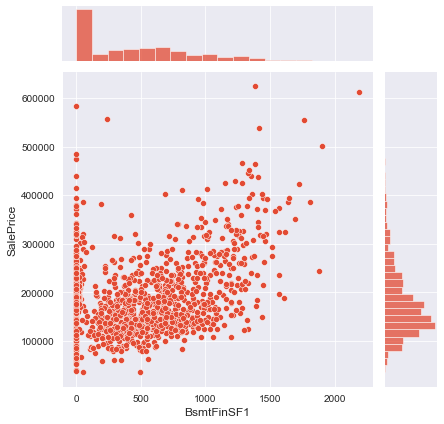

<Figure size 720x720 with 0 Axes>

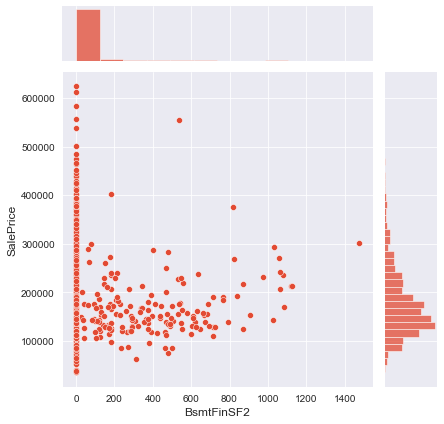

<Figure size 720x720 with 0 Axes>

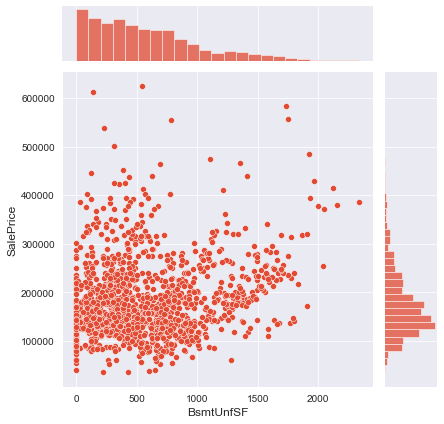

<Figure size 720x720 with 0 Axes>

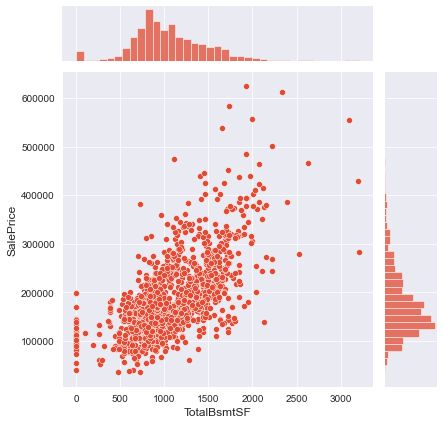

<Figure size 720x720 with 0 Axes>

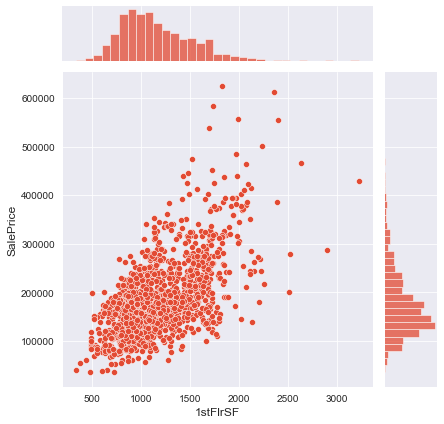

<Figure size 720x720 with 0 Axes>

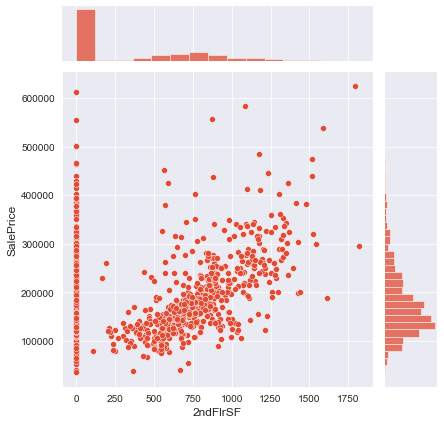

<Figure size 720x720 with 0 Axes>

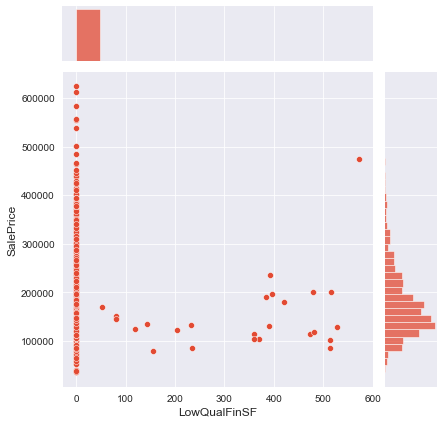

<Figure size 720x720 with 0 Axes>

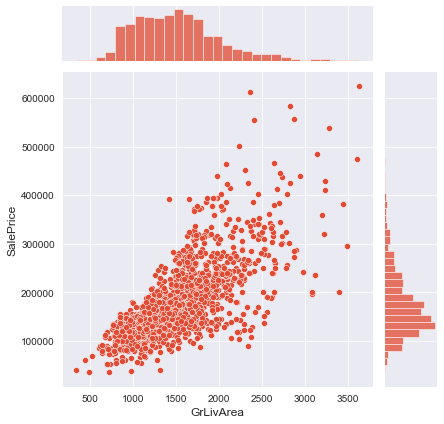

<Figure size 720x720 with 0 Axes>

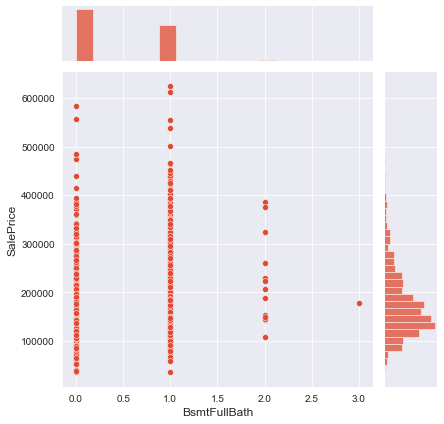

<Figure size 720x720 with 0 Axes>

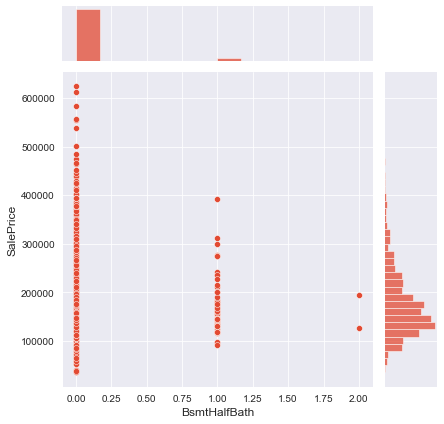

<Figure size 720x720 with 0 Axes>

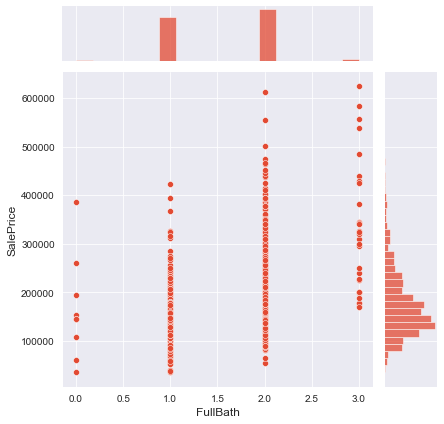

<Figure size 720x720 with 0 Axes>

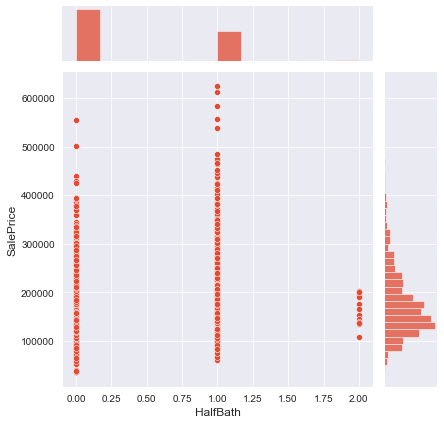

<Figure size 720x720 with 0 Axes>

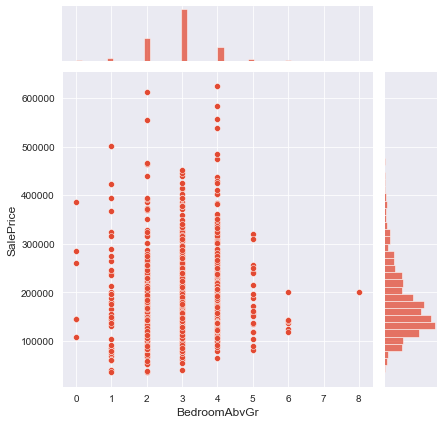

<Figure size 720x720 with 0 Axes>

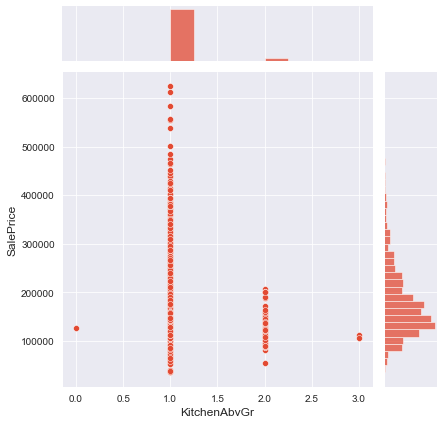

<Figure size 720x720 with 0 Axes>

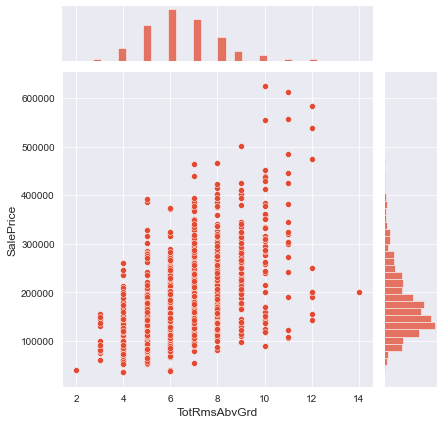

<Figure size 720x720 with 0 Axes>

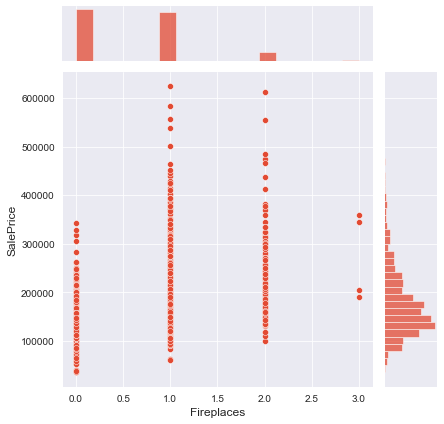

<Figure size 720x720 with 0 Axes>

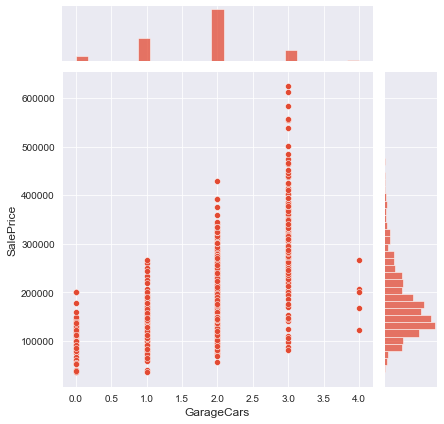

<Figure size 720x720 with 0 Axes>

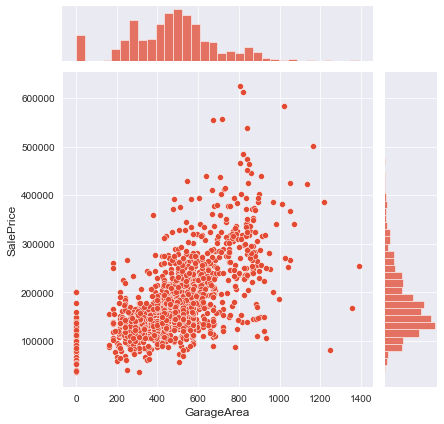

<Figure size 720x720 with 0 Axes>

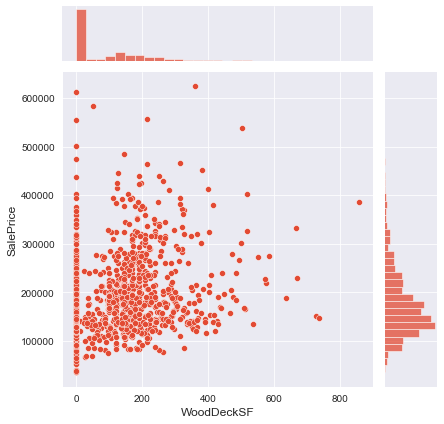

<Figure size 720x720 with 0 Axes>

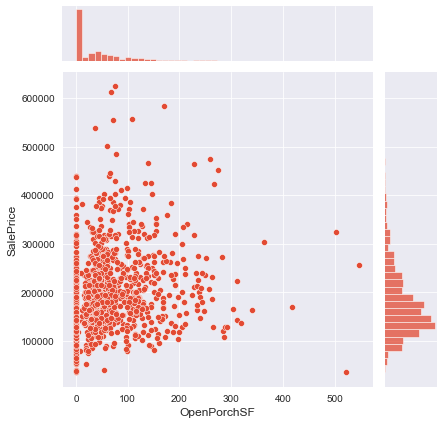

<Figure size 720x720 with 0 Axes>

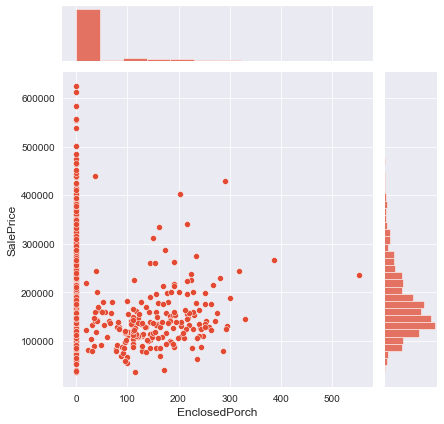

<Figure size 720x720 with 0 Axes>

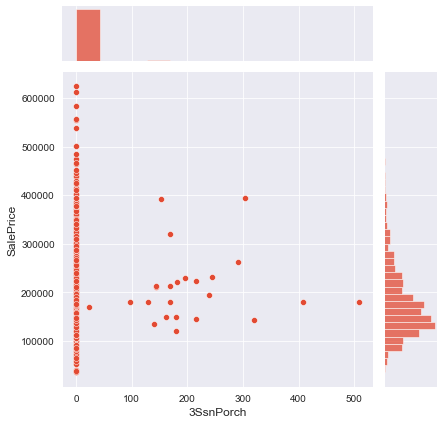

<Figure size 720x720 with 0 Axes>

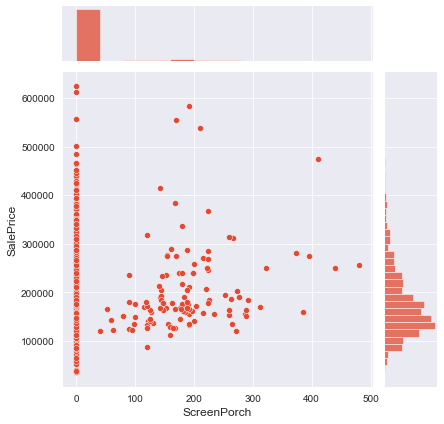

<Figure size 720x720 with 0 Axes>

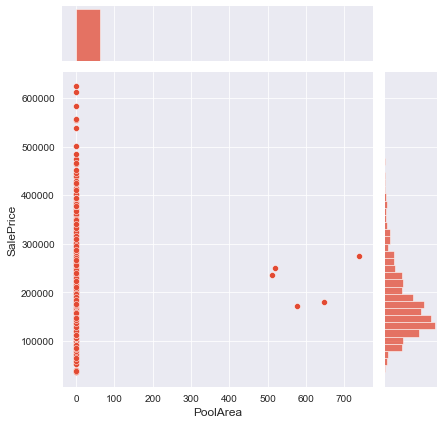

<Figure size 720x720 with 0 Axes>

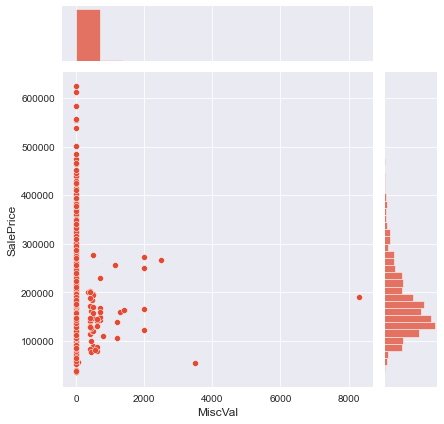

In [9]:
#Adding newly created numerical features as well

col_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',\
            'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',\
            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
            'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
            'ScreenPorch', 'PoolArea','MiscVal',]

y = train_df['SalePrice']

for col in col_list:
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 10))
    x = train_df[col]
    sns.jointplot(x=x, y=y, data=train_df)

## Combining both sets together before processing further:-

1. Separating SalePrice

In [10]:
y = train_df['SalePrice']

In [11]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1453, dtype: int64

2. Combining the main test and train dataframes:-

In [12]:
house_data = pd.concat([train_df.drop(['SalePrice'],axis=1), test_df], ignore_index=True, axis=0)

In [13]:
house_data.shape

(2910, 79)

In [14]:
house_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal


## Numerical variable work:

- New Feature: sold_age = Age of the house when it was sold
- New Feature: Usable space = BsmtFinSF + GrLivArea + 1stFlrSF + 2ndFlrSF
- Total_Halfbaths = sum of all half baths
- Total_Fullbaths = sum of all full baths
- Total porch area = sum of all enclosed porch areas
- BsmtFinSF = sum of Type 1 and Type 2 finished basement area

In [15]:
num_new_features(house_data)

## Categorical variable work:

- Use one of Condition column, same as exterior below

In [16]:
# train_df['Exterior1st'].value_counts()
# train_df['Exterior2nd'].value_counts()

## Combining variables to one string value in some categorical columns:-

- For LandContour column replacing values other than lvl to notlvl.
- For Heating column replacing values other than GasA to Heat_othr.
- For Electrical column replacing values other than SBrkr to Electr_othr. 
- For PavedDrive column replacing values other than Y to NP

In [17]:
cat_column_combine_vars(house_data)

### Ordinal categories for Label-Encoding:
- LotShape, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, 
- BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, 
- GarageCond, PoolQC

In [18]:
house_data[['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',\
        'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2',\
        'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',\
        'PoolQC']]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,No Fireplace,TA,TA,No Pool
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,TA,TA,No Pool
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,TA,TA,No Pool
3,IR1,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Gd,TA,TA,No Pool
4,IR1,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,TA,TA,No Pool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,Reg,Gtl,TA,TA,TA,TA,No,Unf,Unf,Gd,TA,No Fireplace,No Garage,No Garage,No Pool
2906,Reg,Gtl,TA,TA,TA,TA,No,Rec,Unf,TA,TA,No Fireplace,TA,TA,No Pool
2907,Reg,Gtl,TA,TA,TA,TA,No,ALQ,Unf,Ex,TA,TA,TA,TA,No Pool
2908,Reg,Gtl,TA,TA,Gd,TA,Av,GLQ,Unf,TA,TA,No Fireplace,No Garage,No Garage,No Pool


In [19]:
label_encode_features(house_data)

In [20]:
house_data[['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',\
        'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2',\
        'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond',\
        'PoolQC']]

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,3,0,2,4,2,4,3,2,6,0,2,3,5,5,3
1,3,0,3,4,2,4,1,0,6,0,3,5,5,5,3
2,0,0,2,4,2,4,2,2,6,0,2,5,5,5,3
3,0,0,3,4,4,1,3,0,6,2,2,2,5,5,3
4,0,0,2,4,2,4,0,2,6,0,2,5,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,3,0,3,4,4,4,3,6,6,2,3,3,3,3,3
2906,3,0,3,4,4,4,3,5,6,4,3,3,5,5,3
2907,3,0,3,4,4,4,3,0,6,0,3,5,5,5,3
2908,3,0,3,4,2,4,0,2,6,4,3,3,3,3,3


## Nominal categories for One-Hot-Encoding:

- MSSubClass, MSZoning, Street, Alley, LandContour, Utilities, LotConfig,
- Neighborhood, Condition1, Condition2, BldgType, HouseStyle, YearBuilt, YearRemodAdd, RoofStyle, 
- RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, CentralAir,Heating, Electrical, 
- Functional, GarageType, GarageFinish, PavedDrive, Fence, MiscFeature, MoSold, YrSold,
- SaleType, SaleCondition

In [21]:
house_data[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour',\
        'Utilities', 'LotConfig','Neighborhood', 'Condition1', 'Condition2',\
        'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',\
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',\
        'CentralAir','Heating', 'Electrical', 'Functional', 'GarageType',\
        'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',\
        'SaleType', 'SaleCondition']]

,MSSubClass,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,No alley access,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,Typ,Attchd,RFn,Y,No Fence,None,2,2008,WD,Normal
1,20,RL,Pave,No alley access,Lvl,AllPub,FR2,Veenker,Feedr,Norm,...,Typ,Attchd,RFn,Y,No Fence,None,5,2007,WD,Normal
2,60,RL,Pave,No alley access,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,Typ,Attchd,RFn,Y,No Fence,None,9,2008,WD,Normal
3,70,RL,Pave,No alley access,Lvl,AllPub,Corner,Crawfor,Norm,Norm,...,Typ,Detchd,Unf,Y,No Fence,None,2,2006,WD,Abnorml
4,60,RL,Pave,No alley access,Lvl,AllPub,FR2,NoRidge,Norm,Norm,...,Typ,Attchd,RFn,Y,No Fence,None,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,160,RM,Pave,No alley access,Lvl,AllPub,Inside,MeadowV,Norm,Norm,...,Typ,No Garage,No Garage,Y,No Fence,None,6,2006,WD,Normal
2906,160,RM,Pave,No alley access,Lvl,AllPub,Inside,MeadowV,Norm,Norm,...,Typ,CarPort,Unf,Y,No Fence,None,4,2006,WD,Abnorml
2907,20,RL,Pave,No alley access,Lvl,AllPub,Inside,Mitchel,Norm,Norm,...,Typ,Detchd,Unf,Y,No Fence,None,9,2006,WD,Abnorml
2908,85,RL,Pave,No alley access,Lvl,AllPub,Inside,Mitchel,Norm,Norm,...,Typ,No Garage,No Garage,Y,MnPrv,Shed,7,2006,WD,Normal


In [22]:
print(house_data.shape)

(2910, 85)


In [23]:
col_list = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour',\
            'Utilities', 'LotConfig','Neighborhood', 'Condition1', 'Condition2',\
            'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',\
            'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',\
            'CentralAir','Heating', 'Electrical', 'Functional', 'GarageType',\
            'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',\
            'SaleType', 'SaleCondition']

house_data = pd.get_dummies(data=house_data, columns=col_list, drop_first=True)

In [24]:
print(house_data.shape)

(2910, 410)


### Dataset density graphs for numerical variables:

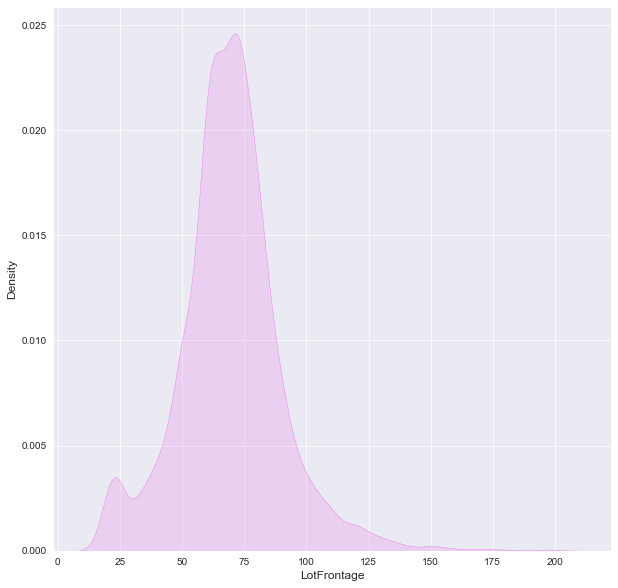

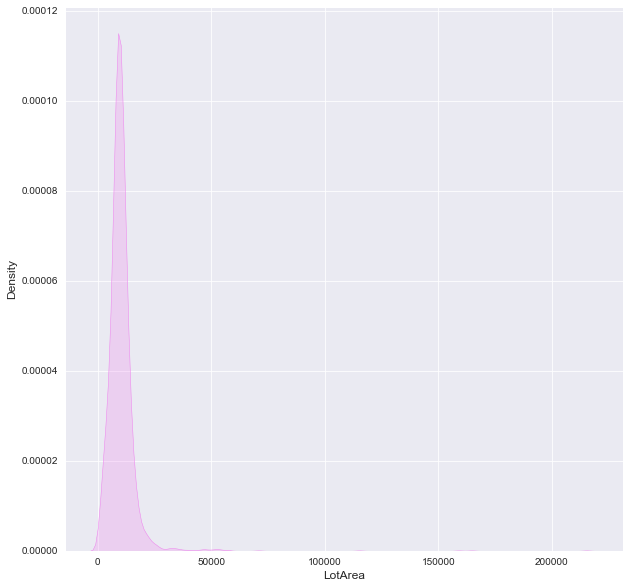

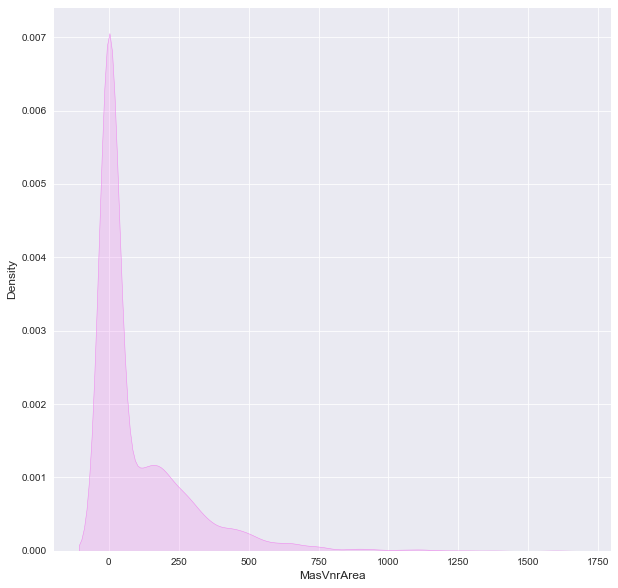

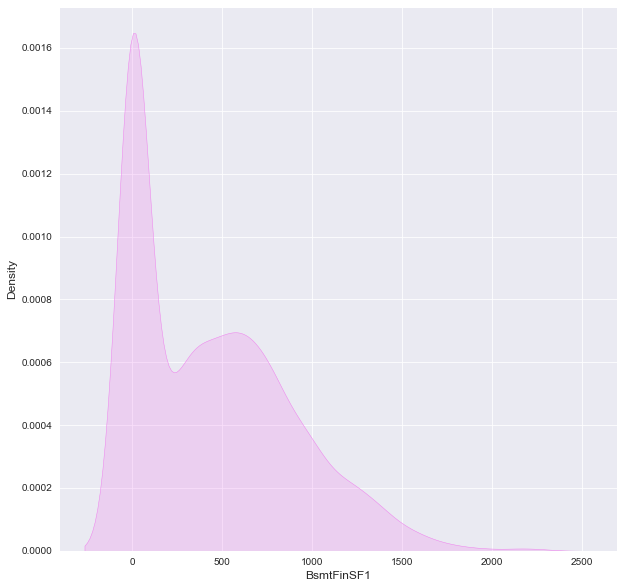

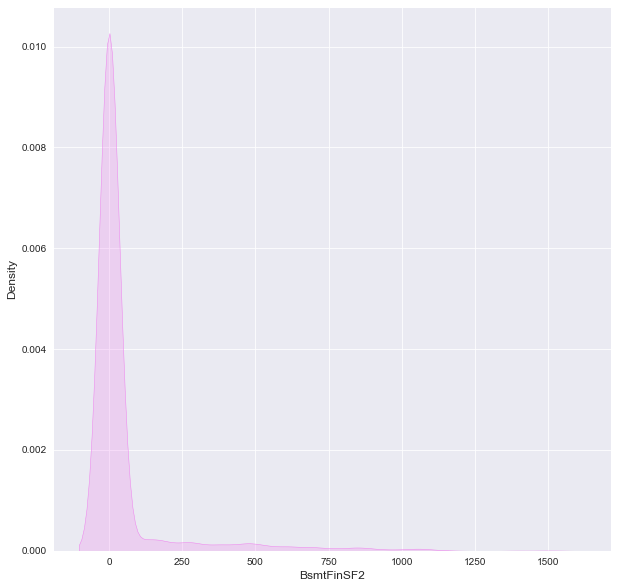

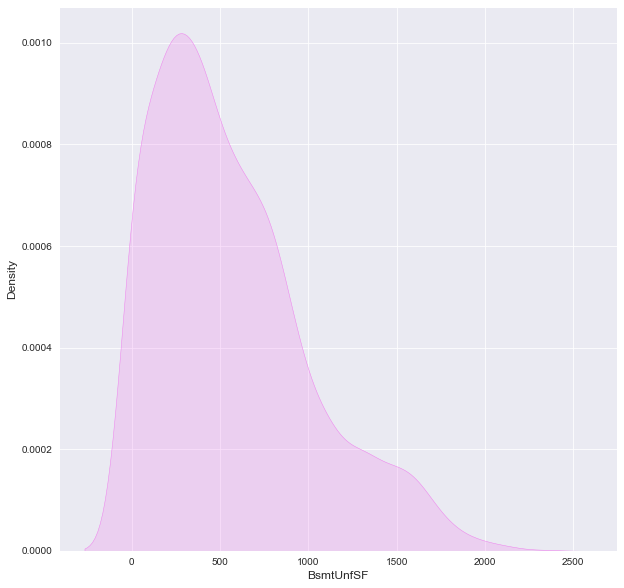

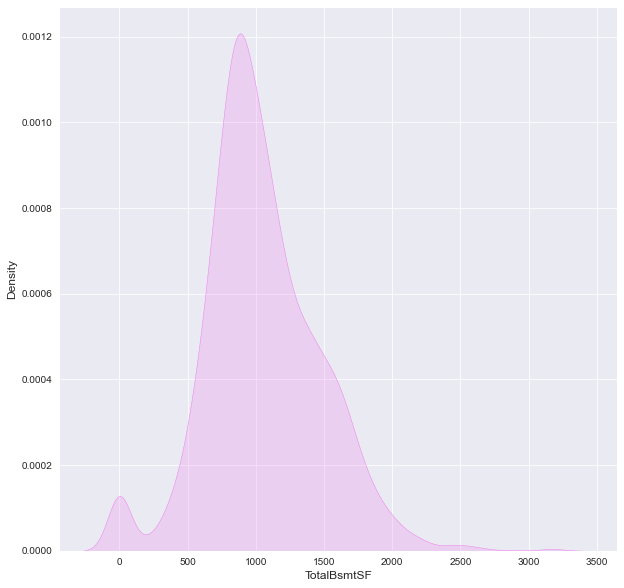

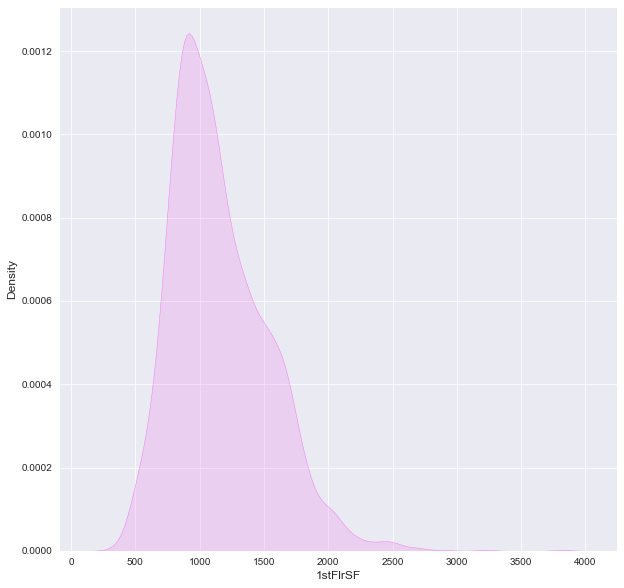

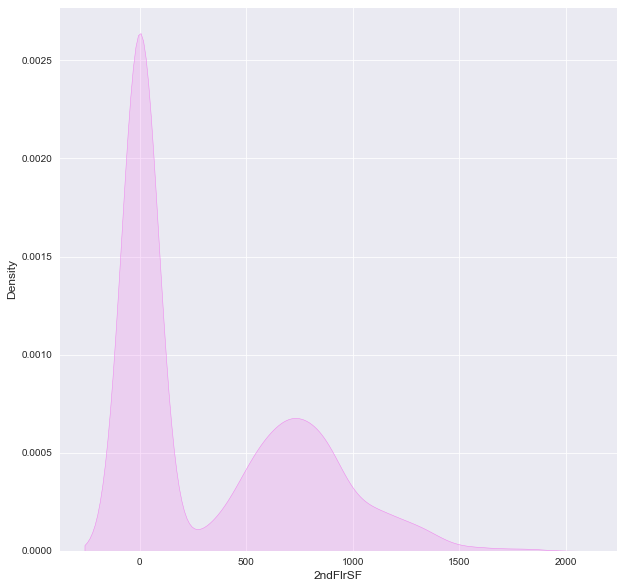

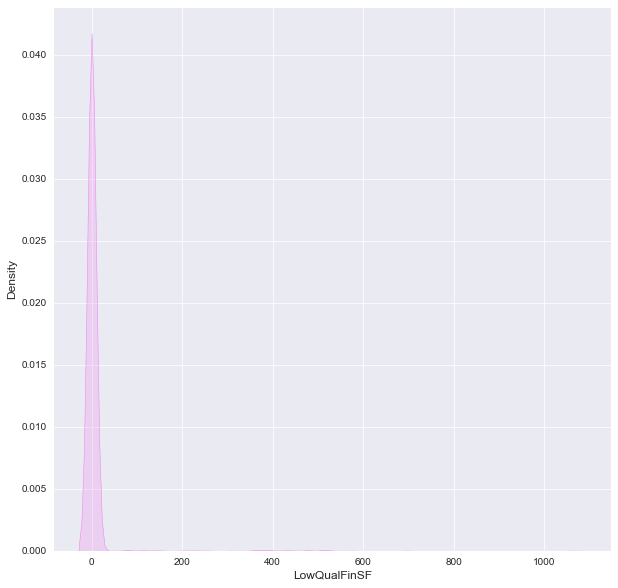

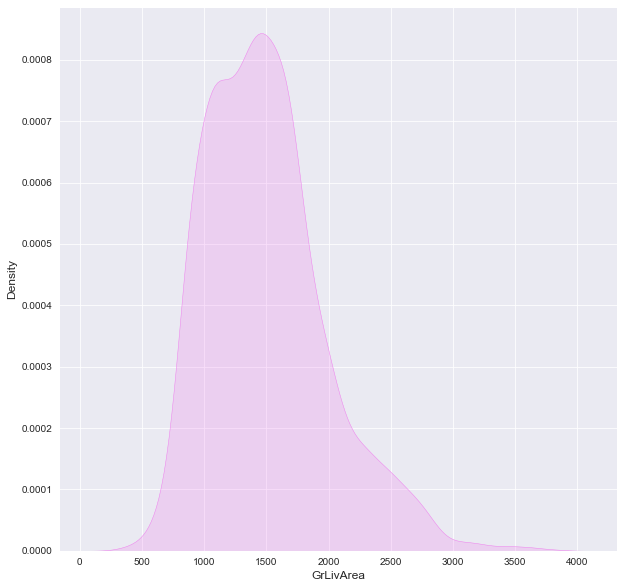

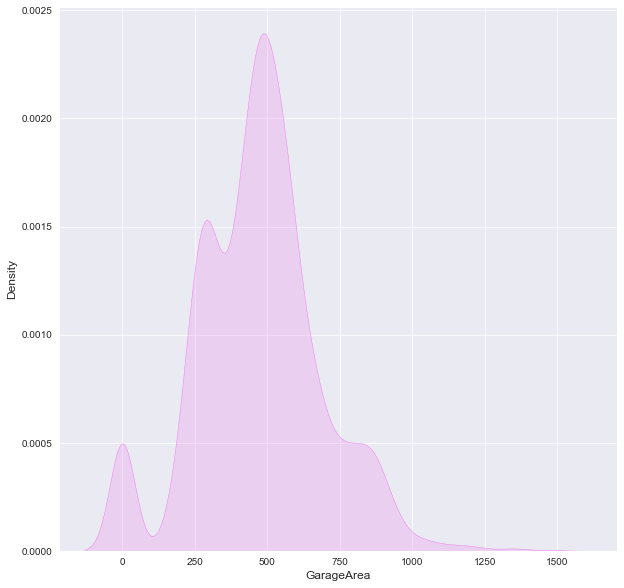

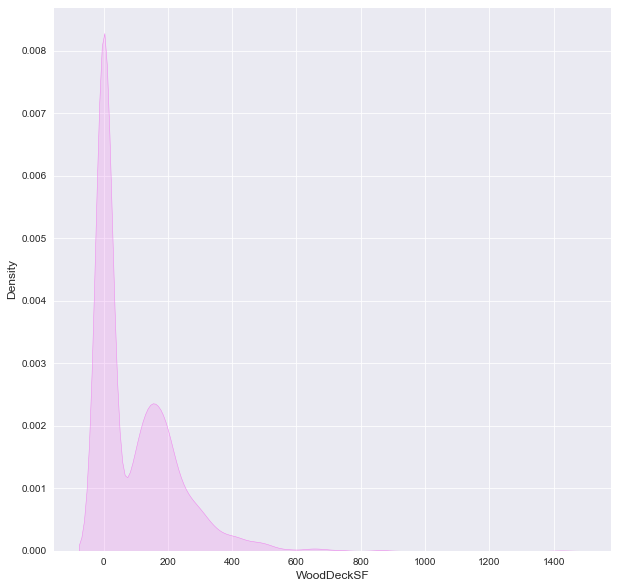

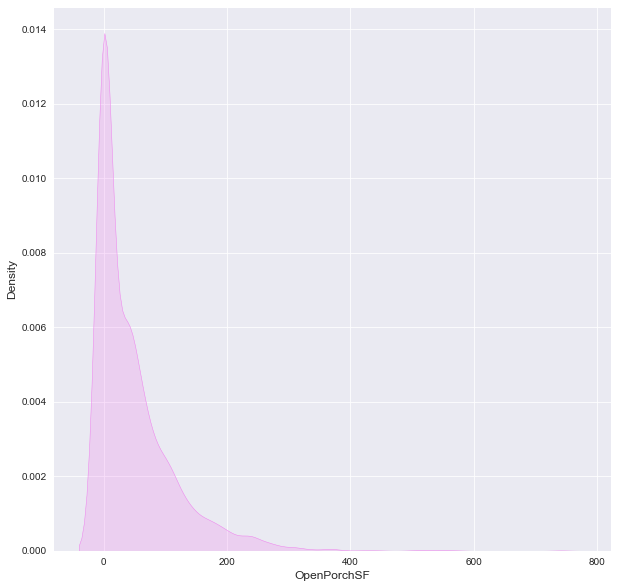

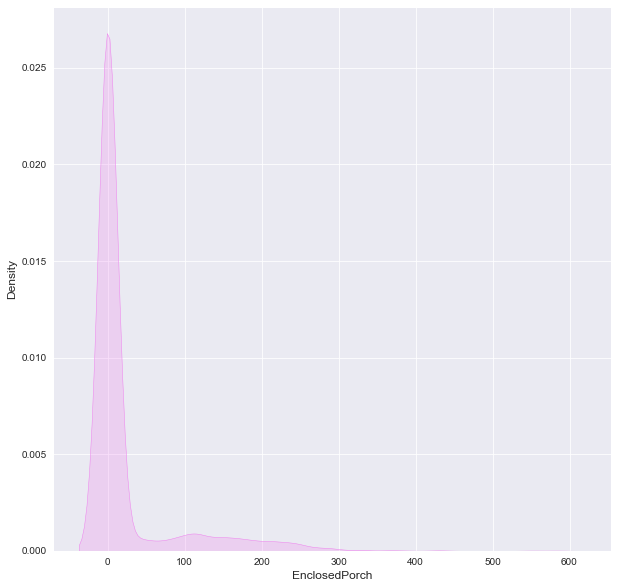

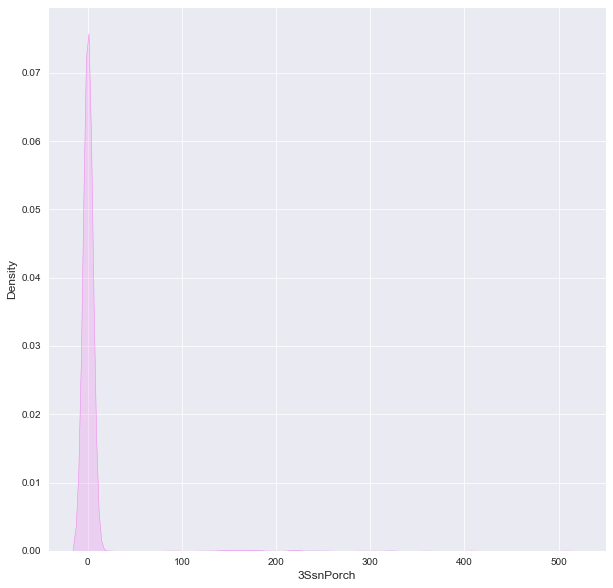

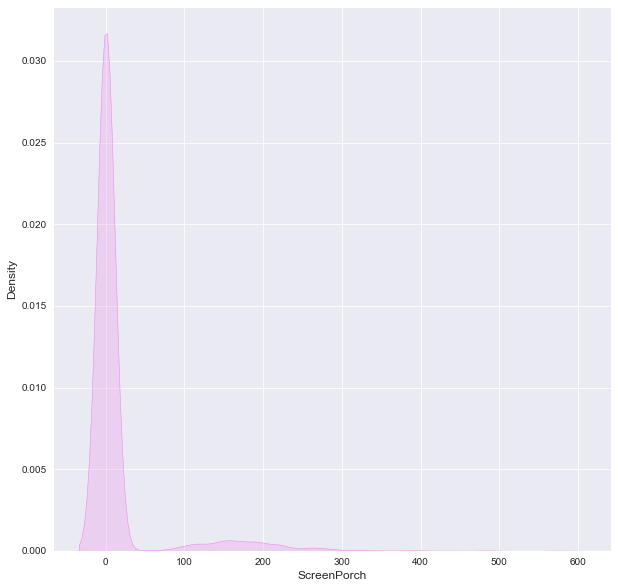

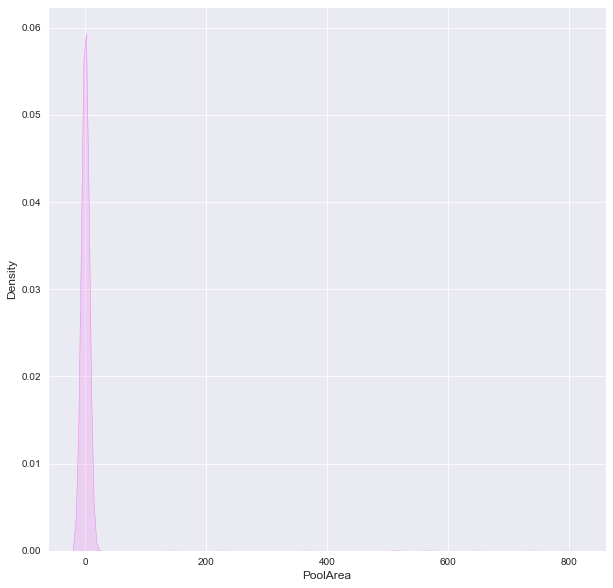

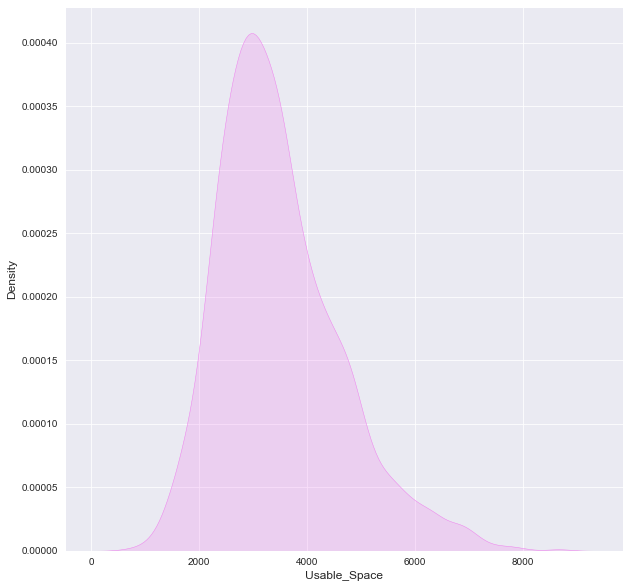

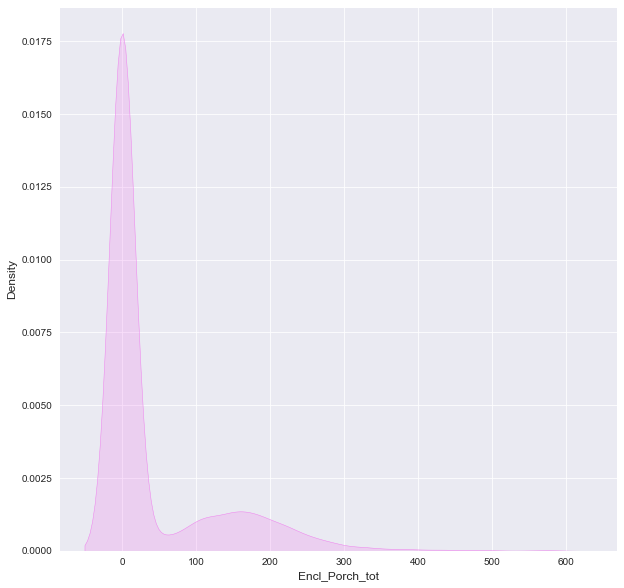

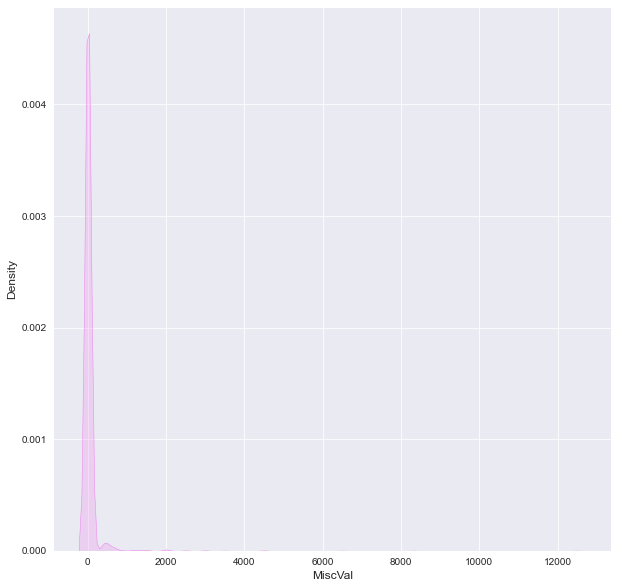

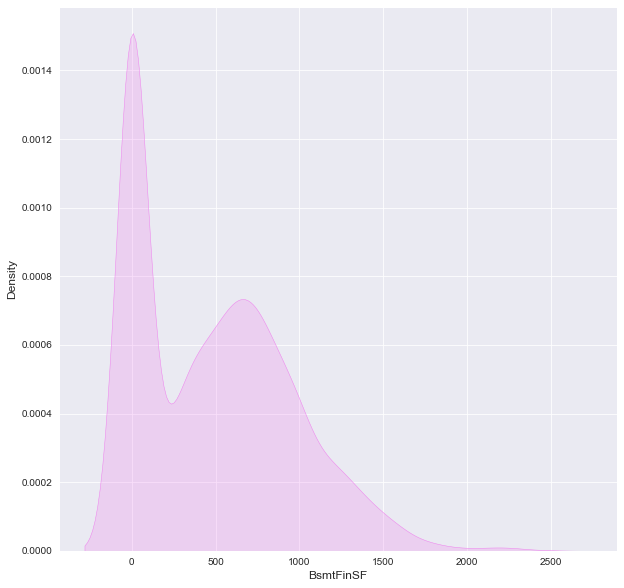

In [25]:
# removing some features such as FullBath, HalfBaths, GarageCars, etc

col_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',\
            'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
            'GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch',\
            'ScreenPorch', 'PoolArea', 'Usable_Space', 'Encl_Porch_tot','MiscVal','BsmtFinSF']

for col in col_list:
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 10))
    x = house_data[col]
    sns.kdeplot(x, shade=True, color="violet")

## Baseline MLR Model:

In [26]:
house_data.head(5)

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,3,0,7,5,196.0,2,4,2,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,3,0,6,8,0.0,3,4,2,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,0,0,7,5,162.0,2,4,2,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0,0,7,5,0.0,3,4,4,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,0,0,8,5,350.0,2,4,2,...,0,0,0,0,1,0,0,0,1,0


In [27]:
house_data.shape

(2910, 410)

In [28]:
## Separating x variables into training and testing datasets
## No transformation applied to the y variable yet

x_train = np.array(house_data.loc[:1452, :])
x_test = np.array(house_data.loc[1453:, :])

In [29]:
mlr_base1 = LinearRegression()
mlr_base1.fit(x_train, y)

print('Train R^2 is equal to %.3f' %mlr_base1.score(x_train, y))
print('The intercept is %.3f' %mlr_base1.intercept_)

Train R^2 is equal to 0.940
The intercept is -292900342.760


(array([  2.,   1.,  13., 136., 832., 420.,  34.,   9.,   2.,   4.]),
 array([-119894.36108691,  -94735.57325653,  -69576.78542616,
         -44417.99759579,  -19259.20976542,    5899.57806495,
          31058.36589532,   56217.15372569,   81375.94155606,
         106534.72938643,  131693.5172168 ]),
 <BarContainer object of 10 artists>)

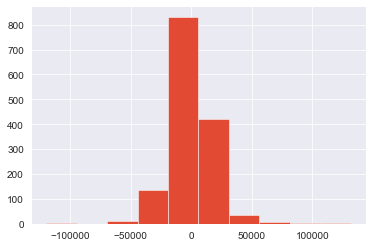

In [30]:
residuals = y - mlr_base1.predict(x_train)
plt.hist(residuals)

In [31]:
# print('The slopes are %s' %mlr_base1.coef_)
print('RSS is equal to %.3f' %np.sum(residuals ** 2))

RSS is equal to 510140280748.835


In [32]:
mlr_base1.predict(x_test)

array([ 1.22365991e+05, -2.38323390e+08,  1.86366316e+05, ...,
        1.91031167e+05,  9.64791107e+04,  2.16648950e+05])

In [36]:
RMSE = sqrt(mean_squared_error(y, mlr_base1.predict(x_train)))
RMSE

18737.515334237385